In [3]:
from db_con import DatabaseConnection
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.widgets import Slider
from matplotlib import ticker
import contextily as cx

with DatabaseConnection() as cur:
    cur.execute("""

        SELECT two.fn, AVG(two.ve) FROM (
        SELECT one.fn as fn, unnest(one.v) as ve FROM (
        SELECT filename as fn, durations as t, distances as d, velos as v, (((ST_Points(geom::geometry))::json) -> 'coordinates') as pts from ride
        ) as one
        ) as two WHERE two.ve > 0.2 AND two.ve != 'NaN' AND two.ve < 15 GROUP BY (two.fn)

    """)
    objs = cur.fetchall()

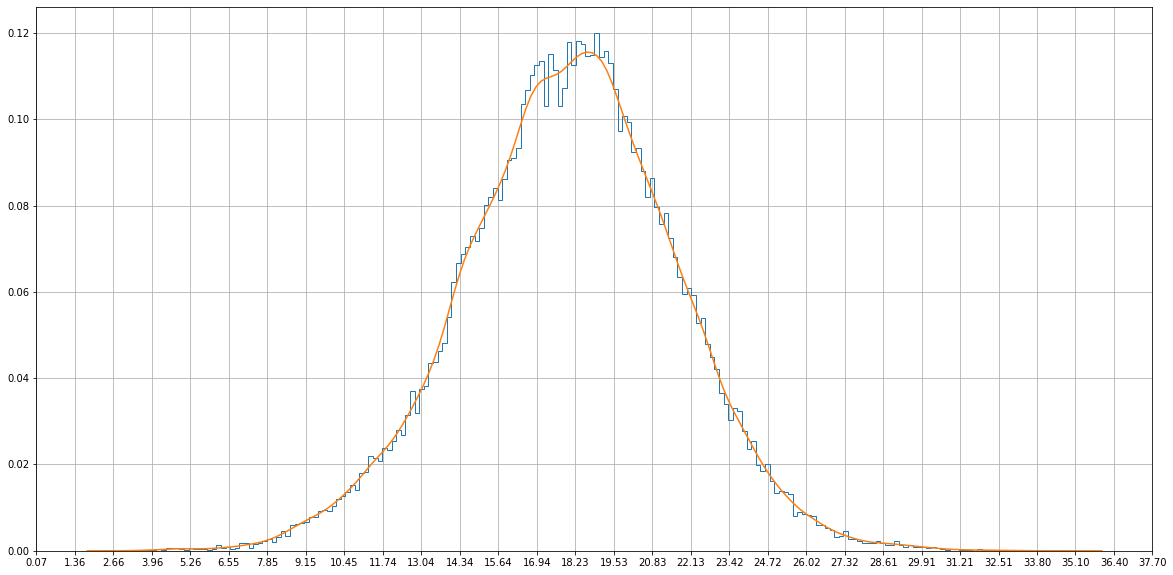

In [4]:
import numpy as np
import scipy.stats as st

pdf = pd.DataFrame(objs, columns=['file', 'avg_speed'])

fig = plt.figure(figsize=[20, 10])

ax = plt.axes()
ax.grid()
ax.xaxis.set_major_locator(ticker.LinearLocator(numticks=30))

plt.hist(pdf['avg_speed'] * 3.6, 200, density=True, histtype='step')
#plt.plot(pdf.sort_values('avg_speed').reset_index()['avg_speed'])

#plt.ylim([0, 10])

mn, mx = plt.xlim()
#plt.xlim(mn, mx)
kde_xs = np.linspace(mn, mx, 200)
kde = st.gaussian_kde(pdf['avg_speed'] * 3.6)
plt.plot(kde_xs, kde.pdf(kde_xs), label="PDF")

plt.show()